# ***Name: Sagar Suryakant Dhuri***

# ***Task 5: Global Terrorism Analysis***

# ***Importing Libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px

# ***Importing URL***

In [11]:
df=pd.read_csv('/content/globalterrorismdb_0718dist.csv',encoding='latin',low_memory=False)

# ***Displaying Dataset***

In [12]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [13]:
df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
16576,198207150003,1982,7,15,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
16577,198207150004,1982,7,15,NaN,0,NaN,69,France,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
16578,198207150005,1982,7,15,NaN,0,NaN,98,Italy,8,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
16579,198207150006,1982,7,15,NaN,0,NaN,159,Peru,3,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,0.0,-9.0,NaN
16580,198207160001,1982,7,16,NaN,0,NaN,185,Spain,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Columns: 135 entries, eventid to related
dtypes: float64(63), int64(18), object(54)
memory usage: 17.1+ MB


In [15]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.658100e+04,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,16581.000000,15975.000000,15975.000000,16581.000000,...,4.170000e+02,1.0,8.800000e+01,1.0,638.000000,486.000000,16580.000000,16580.000000,16580.000000,16580.000000
mean,1.978029e+11,1977.966045,6.201978,15.155962,0.020445,183.120258,5.524878,27.875821,-28.932087,1.253543,...,3.793429e+06,20000.0,1.351280e+06,0.0,2.888715,8.341564,-3.738118,-3.693667,0.263450,-2.668034
std,3.266916e+08,3.270107,3.415697,8.949768,0.141521,170.441089,3.372000,22.109249,55.936993,0.905089,...,4.932135e+07,NaN,4.853561e+06,NaN,1.280881,28.437426,4.552678,4.601334,0.657961,4.561017
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-45.867889,-157.818968,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.976092e+11,1976.000000,3.000000,7.000000,0.000000,69.000000,2.000000,13.692880,-86.600964,1.000000,...,0.000000e+00,20000.0,0.000000e+00,0.0,2.000000,1.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.979051e+11,1979.000000,6.000000,15.000000,0.000000,110.000000,8.000000,35.689125,-6.443767,1.000000,...,0.000000e+00,20000.0,7.050000e+04,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.980121e+11,1980.000000,9.000000,23.000000,0.000000,217.000000,8.000000,43.291618,9.991586,1.000000,...,4.150000e+05,20000.0,7.250000e+05,0.0,4.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.982072e+11,1986.000000,12.000000,31.000000,1.000000,605.000000,12.000000,64.837778,172.636225,5.000000,...,1.000000e+09,20000.0,4.100000e+07,0.0,7.000000,215.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df.isnull().sum()


eventid           0
iyear             0
imonth            0
iday              0
approxdate    16560
              ...  
INT_LOG           1
INT_IDEO          1
INT_MISC          1
INT_ANY           1
related       15876
Length: 135, dtype: int64

In [17]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [18]:
df.duplicated().sum()

0

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.duplicated().sum()

0

In [21]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [22]:
terrorism_df=df[['gname','city','iyear','imonth','iday','country','country_txt','region','region_txt','provstate','latitude','longitude','specificity','vicinity','multiple','success','suicide','attacktype1','attacktype1_txt','targtype1','targtype1_txt','targsubtype1','targsubtype1_txt','target1','natlty1','natlty1_txt']]

In [23]:
terrorism_df

,gname,city,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,...,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt
0,MANO-D,Santo Domingo,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic
1,23rd of September Communist League,Mexico city,1970,0,0,130,Mexico,1,North America,Federal,...,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium
2,Unknown,Unknown,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States
3,Unknown,Athens,1970,1,0,78,Greece,8,Western Europe,Attica,...,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States
4,Unknown,Fukouka,1970,1,0,101,Japan,4,East Asia,Fukouka,...,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16576,Unknown,L'Ile-Rousse,1982,7,15,69,France,8,Western Europe,Corsica,...,0,3,Bombing/Explosion,1,Business,8.0,Hotel/Resort,German owned hotel,75.0,Germany
16577,Unknown,Ajaccio,1982,7,15,69,France,8,Western Europe,Corsica,...,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,restaurants,69.0,France
16578,Red Brigades,Naples,1982,7,15,98,Italy,8,Western Europe,Campania,...,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,"Antonio Ammaturo, 57, Head of Mobile Police Force",98.0,Italy
16579,Unknown,Ayacucho district,1982,7,15,159,Peru,3,South America,Ayacucho,...,0,1,Assassination,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilian,159.0,Peru


In [25]:
terrorism_df['provstate'] = terrorism_df['provstate'].fillna('others') 
terrorism_df['targsubtype1_txt']=terrorism_df['targsubtype1_txt'].fillna('Unknown')
terrorism_df['city']=terrorism_df['city'].fillna('others')
terrorism_df['latitude']=terrorism_df['latitude'].fillna('Unknown')
terrorism_df['longitude']=terrorism_df['longitude'].fillna('Unknown')
terrorism_df['targsubtype1']=terrorism_df['targsubtype1'].fillna(0)
terrorism_df['target1']=terrorism_df['target1'].fillna('others')
terrorism_df['natlty1']=terrorism_df['natlty1'].fillna(0)
terrorism_df['natlty1_txt']=terrorism_df['natlty1_txt'].fillna('others')
terrorism_df['specificity']=terrorism_df['specificity'].fillna(2)


<ipython-input-25-71796aae5601>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df['provstate'] = terrorism_df['provstate'].fillna('others')
<ipython-input-25-71796aae5601>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terrorism_df['targsubtype1_txt']=terrorism_df['targsubtype1_txt'].fillna('Unknown')
<ipython-input-25-71796aae5601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [26]:
terrorism_df


,gname,city,iyear,imonth,iday,country,country_txt,region,region_txt,provstate,...,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt
0,MANO-D,Santo Domingo,1970,7,2,58,Dominican Republic,2,Central America & Caribbean,others,...,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic
1,23rd of September Communist League,Mexico city,1970,0,0,130,Mexico,1,North America,Federal,...,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium
2,Unknown,Unknown,1970,1,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States
3,Unknown,Athens,1970,1,0,78,Greece,8,Western Europe,Attica,...,0,3,Bombing/Explosion,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Embassy,217.0,United States
4,Unknown,Fukouka,1970,1,0,101,Japan,4,East Asia,Fukouka,...,0,7,Facility/Infrastructure Attack,7,Government (Diplomatic),46.0,Embassy/Consulate,U.S. Consulate,217.0,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16576,Unknown,L'Ile-Rousse,1982,7,15,69,France,8,Western Europe,Corsica,...,0,3,Bombing/Explosion,1,Business,8.0,Hotel/Resort,German owned hotel,75.0,Germany
16577,Unknown,Ajaccio,1982,7,15,69,France,8,Western Europe,Corsica,...,0,3,Bombing/Explosion,1,Business,2.0,Restaurant/Bar/Café,restaurants,69.0,France
16578,Red Brigades,Naples,1982,7,15,98,Italy,8,Western Europe,Campania,...,0,1,Assassination,3,Police,25.0,Police Security Forces/Officers,"Antonio Ammaturo, 57, Head of Mobile Police Force",98.0,Italy
16579,Unknown,Ayacucho district,1982,7,15,159,Peru,3,South America,Ayacucho,...,0,1,Assassination,14,Private Citizens & Property,67.0,Unnamed Civilian/Unspecified,Civilian,159.0,Peru


In [27]:
terrorism_df.shape


(16581, 26)

In [28]:
terrorism_df.isnull().sum()

gname               1
city                0
iyear               0
imonth              0
iday                0
country             0
country_txt         0
region              0
region_txt          0
provstate           0
latitude            0
longitude           0
specificity         0
vicinity            0
multiple            0
success             0
suicide             0
attacktype1         0
attacktype1_txt     0
targtype1           0
targtype1_txt       0
targsubtype1        0
targsubtype1_txt    0
target1             0
natlty1             0
natlty1_txt         0
dtype: int64

In [29]:
print(terrorism_df['targtype1_txt'].nunique())  
# There was a total of 22 types of Target

22


<Axes: xlabel='attacktype1_txt', ylabel='count'>

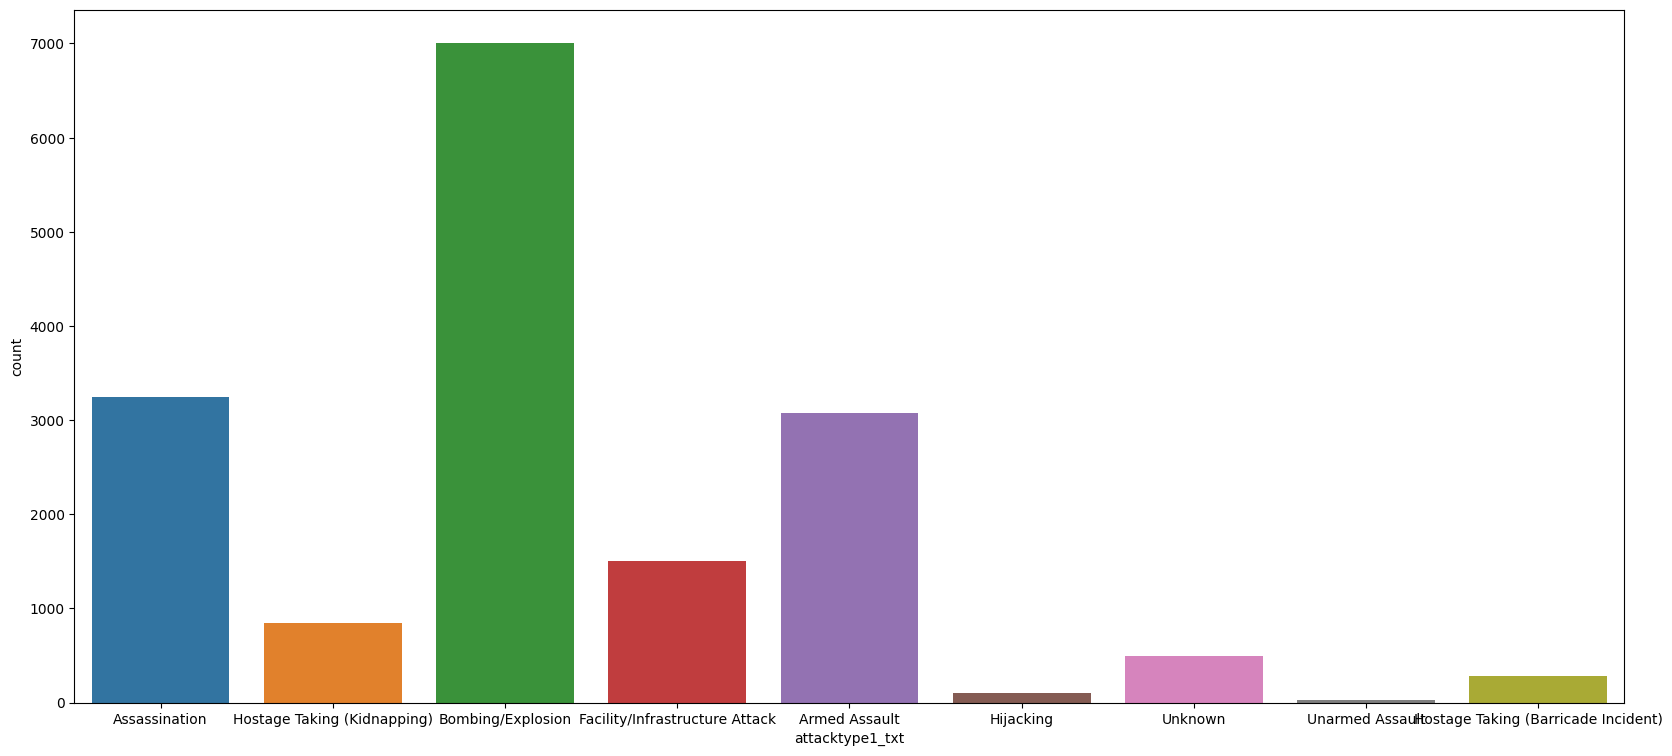

In [30]:
plt.figure(figsize=(20,9));
sns.countplot(x=terrorism_df.attacktype1_txt)

# ***Most of the attacks were done through Bombing and Explosions.***

<ipython-input-31-99eef65e842d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=terrorism_df.corr()


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'iyear'),
  Text(1.5, 0, 'imonth'),
  Text(2.5, 0, 'iday'),
  Text(3.5, 0, 'country'),
  Text(4.5, 0, 'region'),
  Text(5.5, 0, 'specificity'),
  Text(6.5, 0, 'vicinity'),
  Text(7.5, 0, 'multiple'),
  Text(8.5, 0, 'success'),
  Text(9.5, 0, 'suicide'),
  Text(10.5, 0, 'attacktype1'),
  Text(11.5, 0, 'targtype1'),
  Text(12.5, 0, 'targsubtype1'),
  Text(13.5, 0, 'natlty1')])

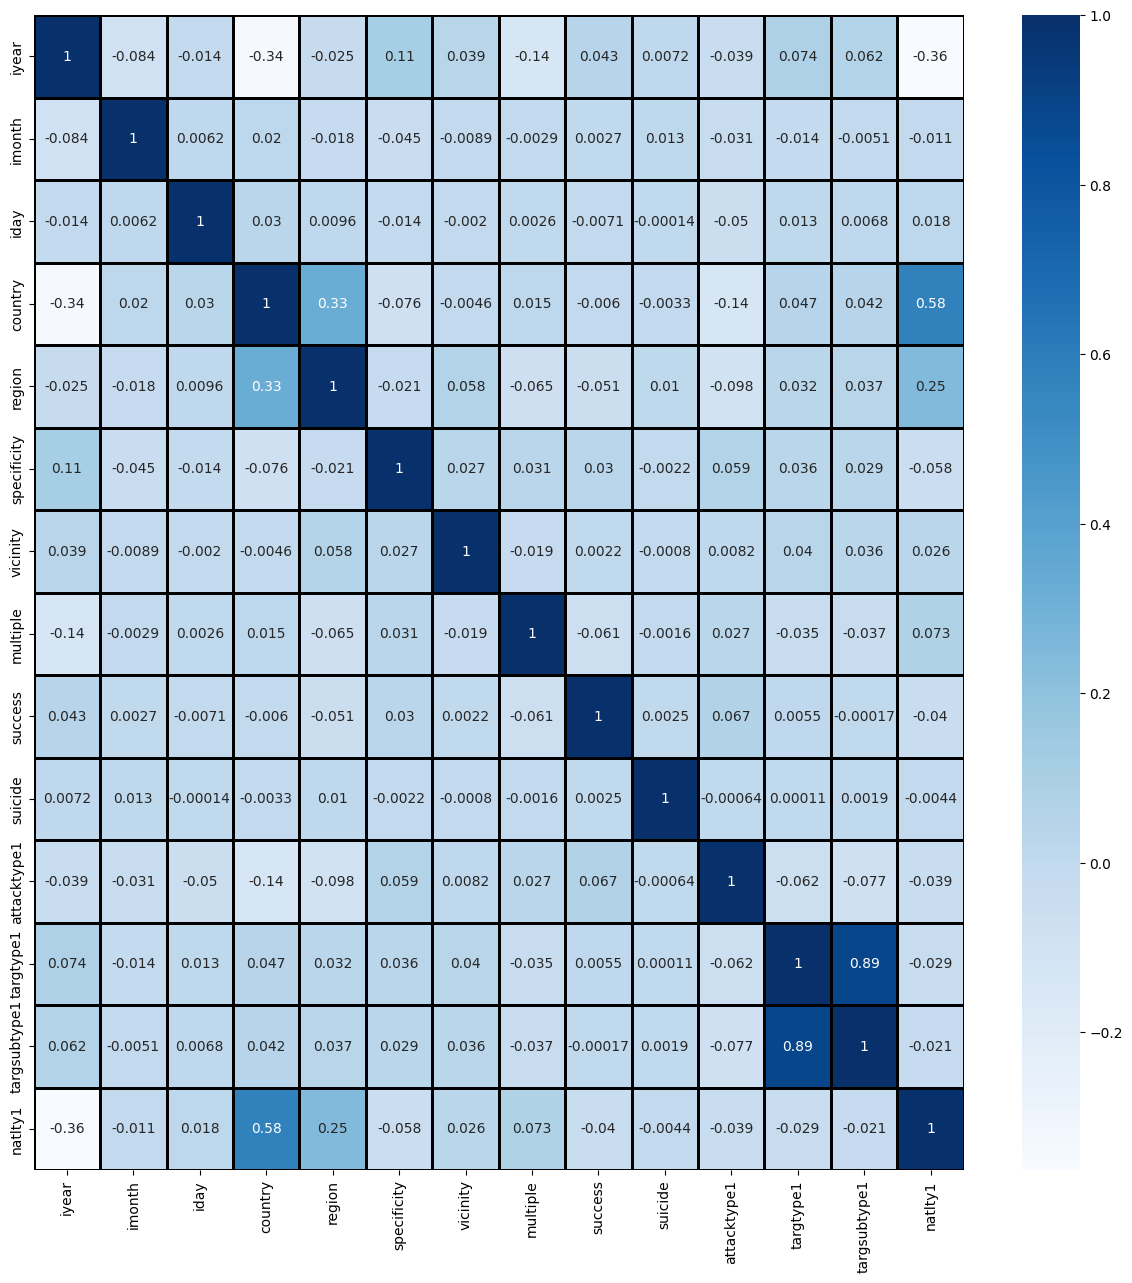

In [31]:
corr=terrorism_df.corr() 
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='Blues',linewidth=1,linecolor='Black') 
plt.xticks(rotation=90)

# ***targtype1 and targusbtype1 have positve Correlation as well as natlty1 and iyear.***

<Axes: title={'center': 'Attacks by Year'}, xlabel='iyear', ylabel='count'>

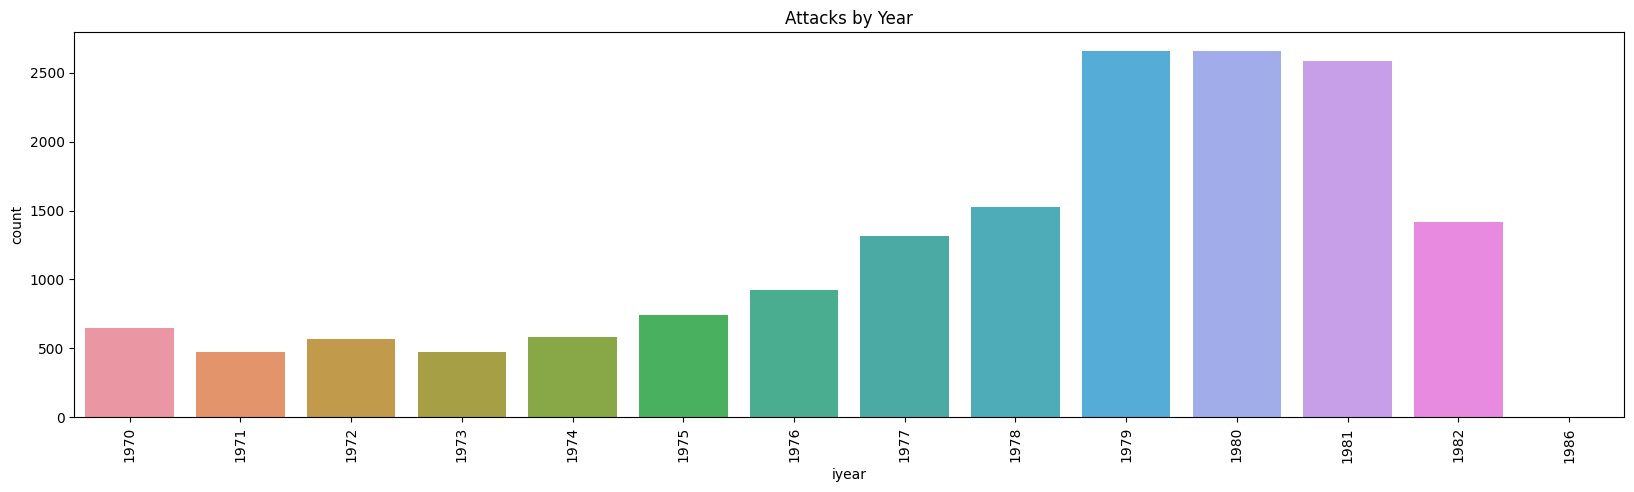

In [32]:
plt.figure(figsize=(20,5));
plt.xticks(rotation = 90)
plt.title('Attacks by Year')
sns.countplot(x=terrorism_df.iyear)

# ***Most of the attacks were happened in the year 1979 and 1980***

<Axes: title={'center': 'Attacks by Month'}, xlabel='imonth', ylabel='count'>

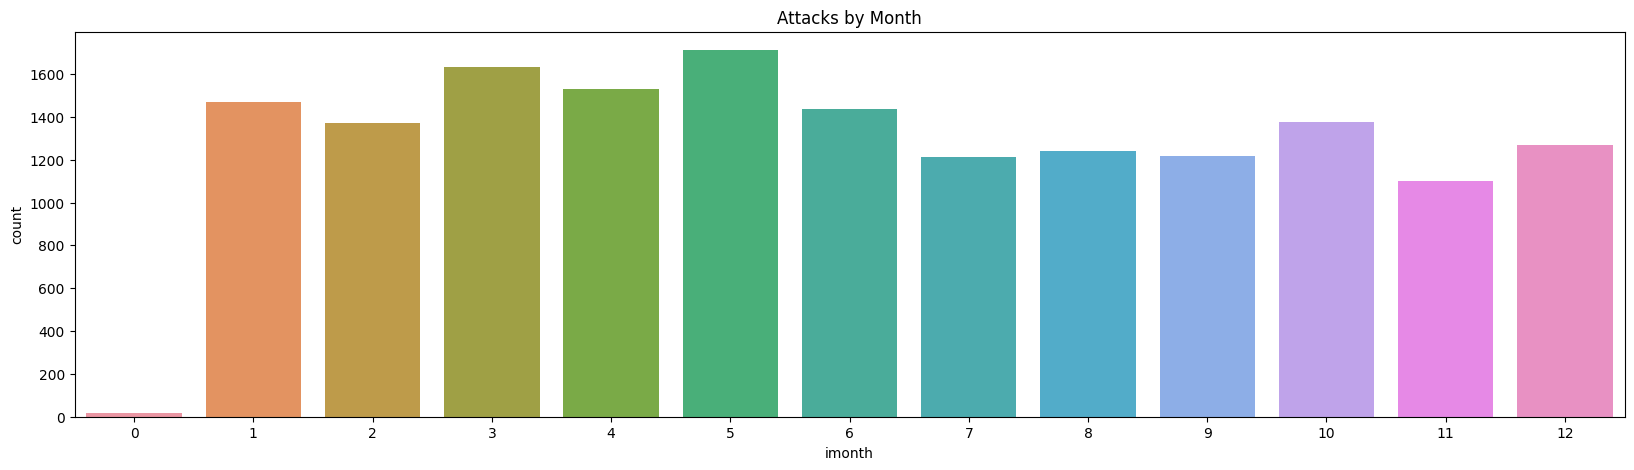

In [33]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=terrorism_df.imonth)

# ***In this as you can see, in every month there are attacks, which is high but out of 12 months the most attacks were done in the month of May.***

<Axes: title={'center': 'Attacks by Month'}, xlabel='iday', ylabel='count'>

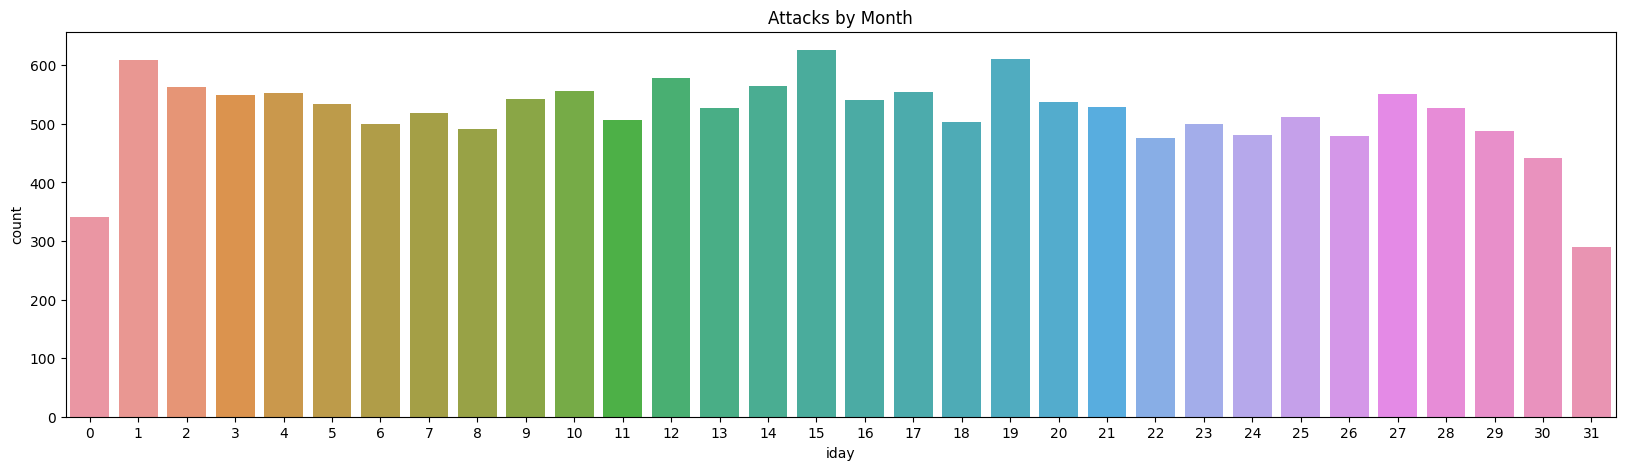

In [34]:
plt.figure(figsize=(20,5));
plt.title('Attacks by Month')
sns.countplot(x=terrorism_df.iday)

# ***The attacks done at the day of 15 is higher than the others.***

<Axes: title={'center': 'Attacks in Countries'}, xlabel='country_txt', ylabel='count'>

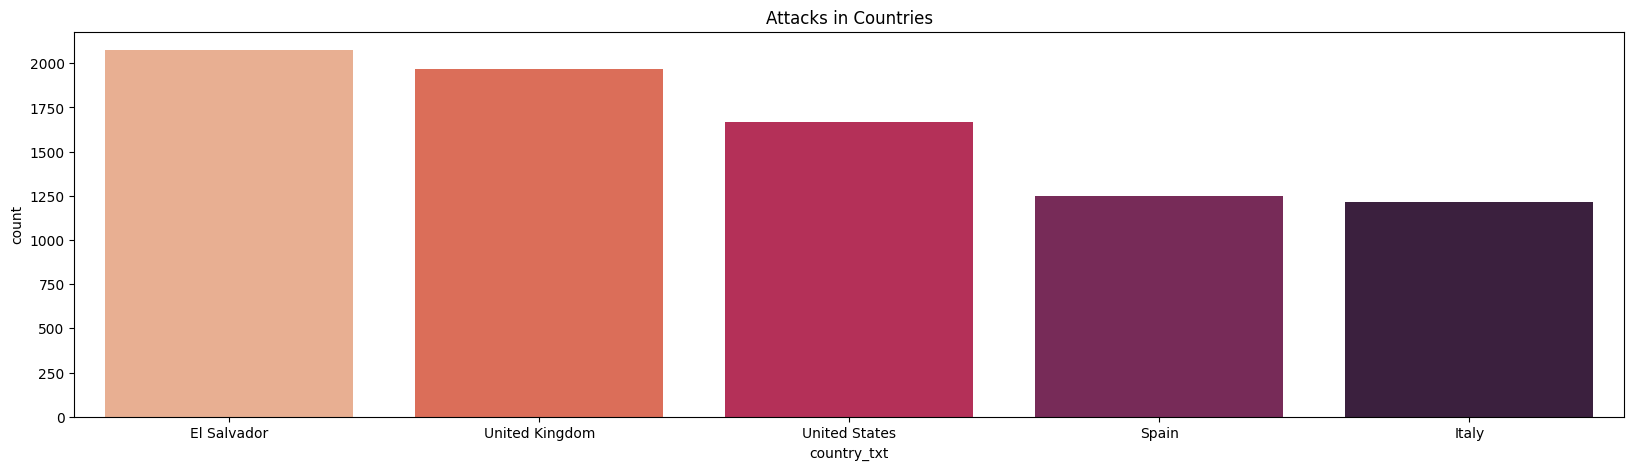

In [35]:
plt.figure(figsize=(20,5));
plt.title('Attacks in Countries')
sns.countplot(x=terrorism_df['country_txt'],palette='rocket_r',order=terrorism_df['country_txt'].value_counts()[0:5].index)

# ***From this visualization we can conclude that El Salvador has suffered most attacks than others.***

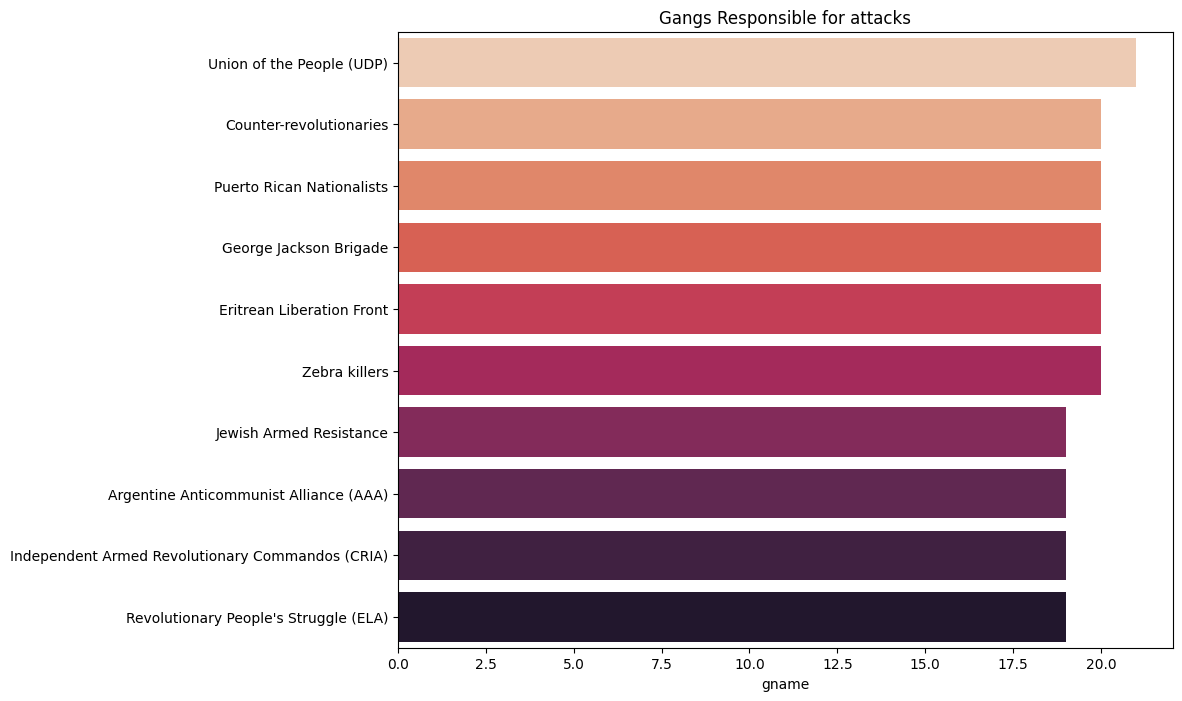

In [36]:
plt.figure(figsize=(10,8))
plt.title("Gangs Responsible for attacks")
sns.barplot(x=terrorism_df["gname"].value_counts()[78:88],y=terrorism_df["gname"].value_counts()[78:88].index,palette='rocket_r')
plt.show()

# ***In this, as you can see UDP have caused more gang attacks than others.***

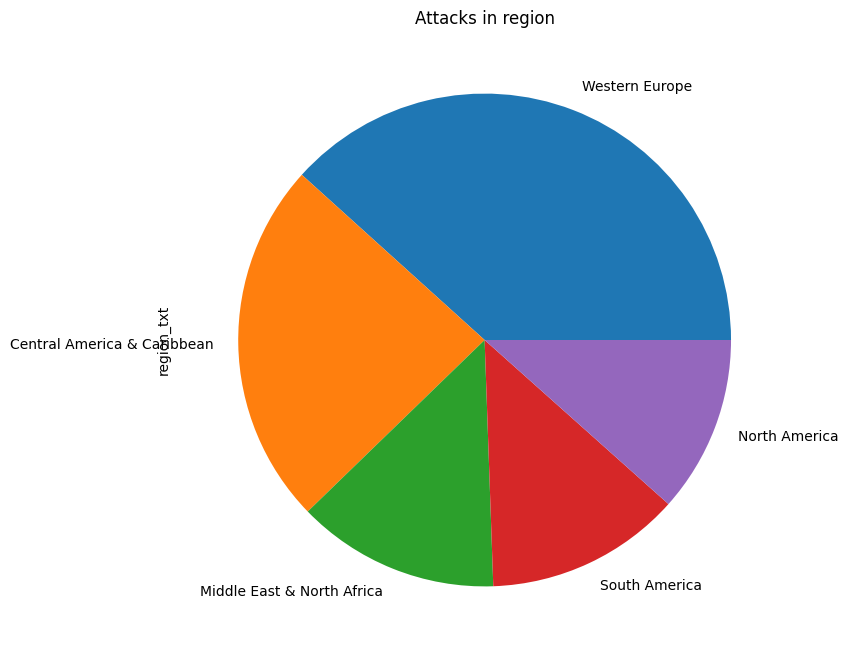

In [47]:
plt.figure(figsize=(20,8))
plt.title('Attacks in region')
terrorism_df['region_txt'].value_counts().head(5).plot.pie()
plt.show()

### ***The most attacks happened in Western Europe***

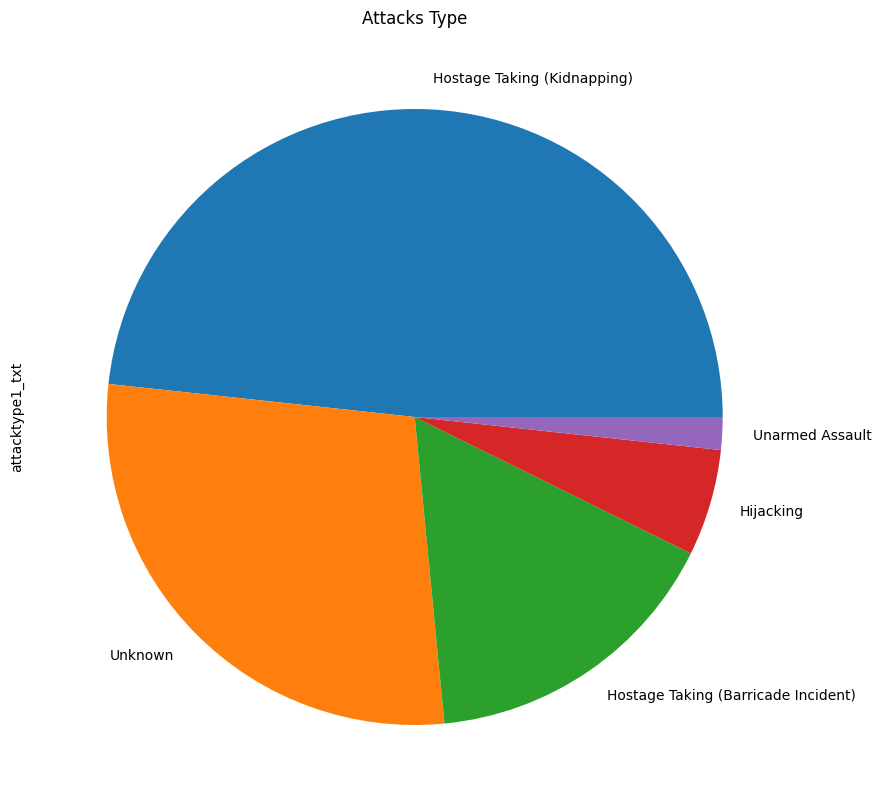

In [48]:
plt.figure(figsize=(15,10))
plt.title('Attacks Type')
terrorism_df['attacktype1_txt'].value_counts().tail(5).plot.pie()
plt.show()

# ***The type of attacks terrorist do is Kidnapping.***

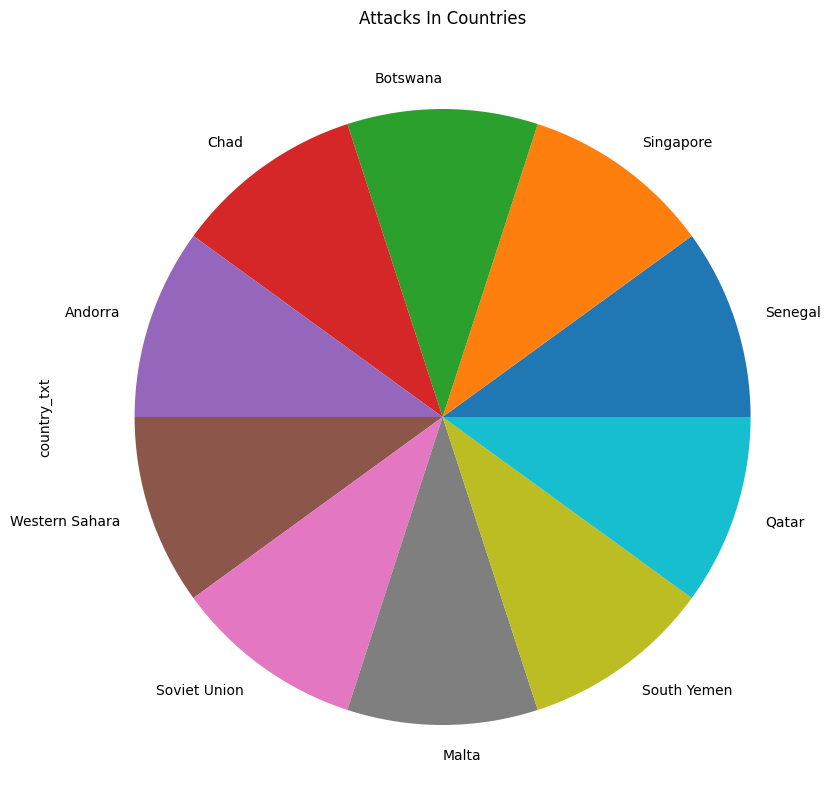

In [49]:
plt.figure(figsize=(15,10))
plt.title('Attacks In Countries')
terrorism_df['country_txt'].value_counts().tail(10).plot.pie()
plt.show()

# ***Equal amount attacks were done in countries.***

In [50]:
#Thank You